# Contextual Bandits

Contextual Search tasks are intermediate between the k-armed bandit problem and the full reinforcement learning problem.
Contextual Search involves both trial-and-error learning to search for the best actions, and association of these actions with the situations in which they are best.

In this exemple we want from the model to learn what is the best action to choose whenever the environment give a state s.
In order to achieve that we make each state have it's unique action's distributions and the model can determine for each state the best action by keeping a history of rewards for each state and by using the $\epsilon$-greedy he can learn what to choose for each state.

In [1]:
### Importing Modules ###
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
class ContextualBandit():
    # k : The actions numbers.
    # epsilon : Exploration prob.
    # op_init : Optimistic initial value.
    # rewards : List of rewards for each machine that represent the history of rewards for each action.
    # k_action_values : k random number that represent the mean of each machine at each state.
    def __init__(self, k, nbs, epsilon, opt_init):
        self.k = k
        self.nbs = nbs
        self.epsilon = epsilon
        self.k_action_values = [np.random.normal(0.0, 1.0, k) for i in range(nbs)]
        self.rewards = np.array([[float(opt_init)] * k] * nbs)
        self.counter_played = np.array([[1.] * k] * nbs)
        self._rewards_sum = []
        self._state_rewards_sum = [[] for i in range(nbs)]
    
    # Select the best action at specific state.
    def selected_slot(self, s):
        return (np.argmax([x/y for x, y in zip(self.rewards[s], self.counter_played[s])]))

    def update_rewards(self, index, k_action_values, s):
        true_rewards = [np.random.normal(loc=m, scale=1.0) for m in self.k_action_values[s]]
        self.rewards[s][index] += true_rewards[index]
    
    def play(self):
        # Check the environment state.
        s = np.random.randint(0, self.nbs)
        
        rand = np.random.randint(1, 100)
        if rand > self.epsilon*100:
            # Greedy selection.
            index = self.selected_slot(s)
            self.update_rewards(index, self.k_action_values, s)
            _sum = 0
            for i in range(self.nbs):
                _sum += sum(self.rewards[i])
                self._state_rewards_sum[i].append(sum(self.rewards[i]))
            self._rewards_sum.append(_sum)
        else:
            # Randomly selection based on the equation above.
            rand_slot = np.random.randint(0,self.k)
            self.update_rewards(rand_slot, self.k_action_values, s)
            _sum = 0
            for i in range(self.nbs):
                _sum += sum(self.rewards[i])
                self._state_rewards_sum[i].append(sum(self.rewards[i]))
            self._rewards_sum.append(_sum)
    
    # Plot the accumulated rewards from all the states.
    def plot_rewards(self):
        plt.xlabel("Iterations")
        plt.ylabel("Accumulated rewards from all states")
        x = range(len(self._rewards_sum))
        plt.plot(x, self._rewards_sum)
    
    # Plot the accumulated rewards for specific state i.
    def plot_state_rewards(self, i):
        plt.xlabel("Iterations")
        plt.ylabel("Accumulated rewards from state {}".format(i))
        x = range(len(self._state_rewards_sum[i]))
        plt.plot(x, self._state_rewards_sum[i])

In [3]:
# 5 machines, 3 states, epsilon 0.01, opt_init 0
c = ContextualBandit(5, 3, 0.01, 0)

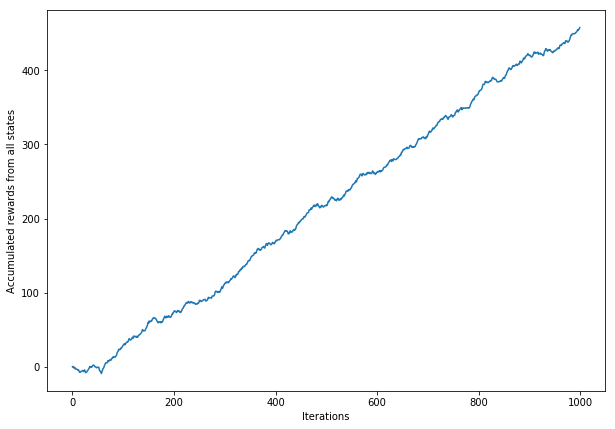

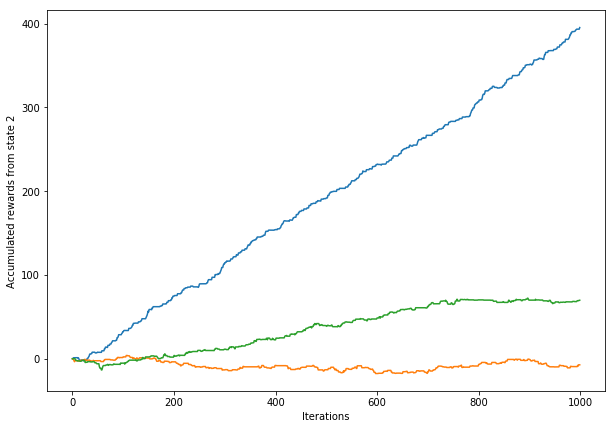

In [4]:
for i in range(1000):
    c.play()
    
plt.figure(figsize=(10, 7))   
c.plot_rewards()

# Plot the evolution of the rewards's sum for state 1, 2, 3
plt.figure(figsize=(10, 7))   
c.plot_state_rewards(0)
c.plot_state_rewards(1)
c.plot_state_rewards(2)